In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Условие 1: Задача 1
Постройте график<br>
Назовите график<br>
Сделайте именование оси x и оси y<br>
Сделайте выводы<br>

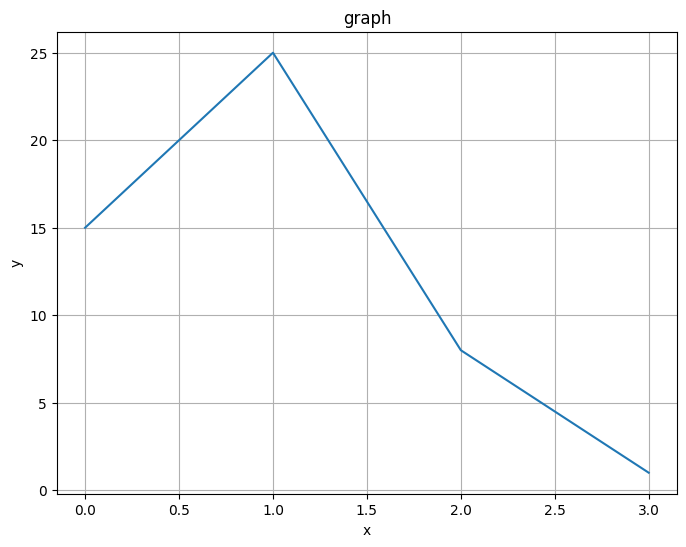

In [2]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1, 2, 3], [15, 25, 8, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('graph')
plt.grid();

### 1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/esratmaria/house-price-dataset-with-other-information

In [3]:
df = pd.read_csv('./kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df['price'].min()

75000.0

### 1.2 Изучите стоимости недвижимости

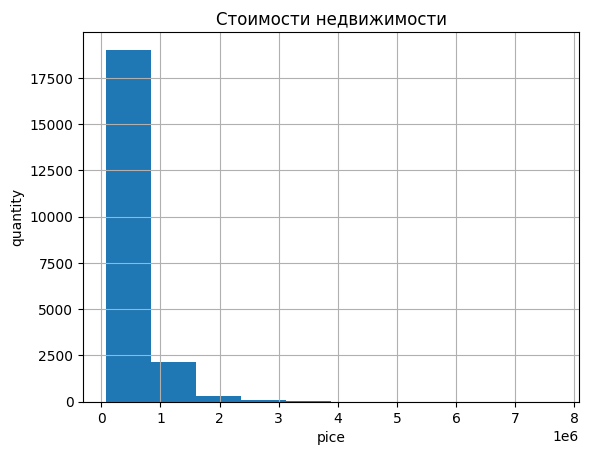

In [5]:
plt.hist(df['price'], bins=10)
plt.title('Стоимости недвижимости')
plt.xlabel('pice')
plt.ylabel('quantity')
plt.grid();

Наибольшее количество домов со стоимостью до 1 000 000

### 1.3 Изучите распределение квадратуры жилой

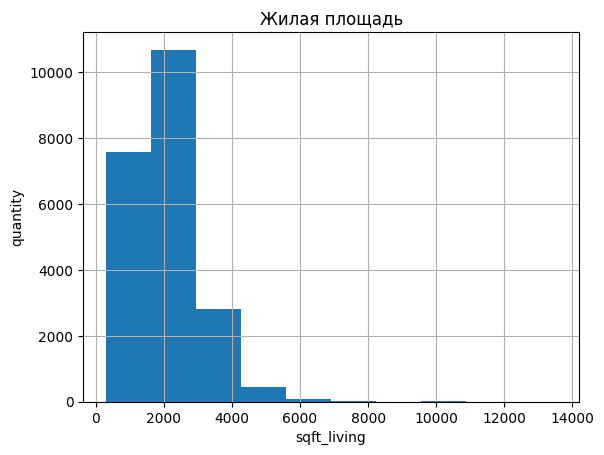

In [6]:
plt.hist(df['sqft_living'])
plt.title('Жилая площадь')
plt.xlabel('sqft_living')
plt.ylabel('quantity')
plt.grid();

Наибольшее количество домов с жилой площадью от ~1.9 до 2.3 тыс.

### 2.1.4 Изучите распределение года постройки

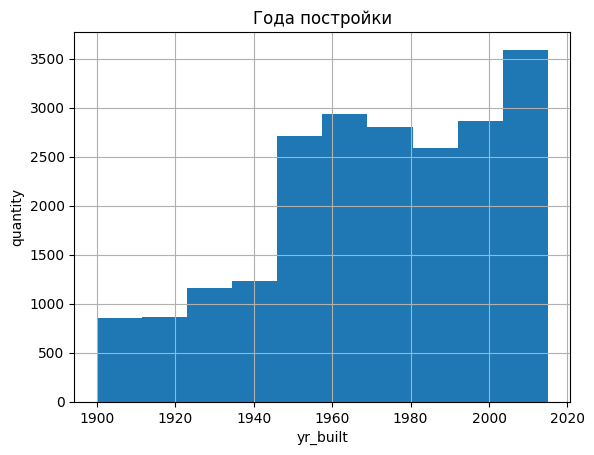

In [7]:
plt.hist(df['yr_built'])
plt.title('Года постройки')
plt.xlabel('yr_built')
plt.ylabel('quantity')
plt.grid();

Основная масса домом построена в период от ~1950 до 2018

## Условие 2: 2 задача
### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график<br>
Сделайте выводы

In [8]:
temp = df['waterfront'].value_counts()
temp

0    21450
1      163
Name: waterfront, dtype: int64

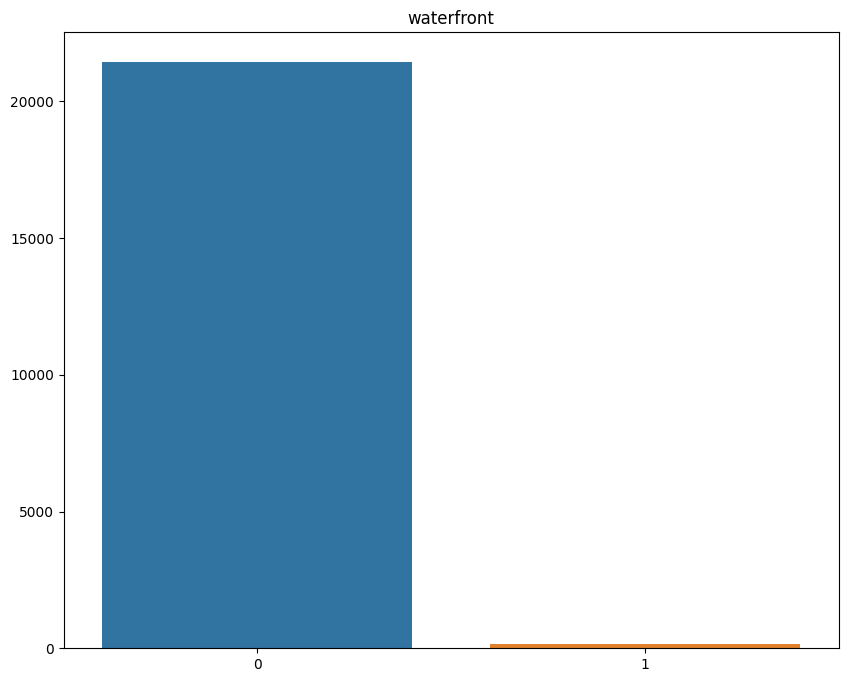

In [9]:
plt.figure(figsize=(10, 8))
plt.title('waterfront')
sns.barplot(x=temp.index, y=temp.values)
plt.show()

Подавляющее количество домов без вида на набережную

### 2.2 Изучите распределение этажей домов

In [10]:
data = df['floors'].value_counts()
data

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

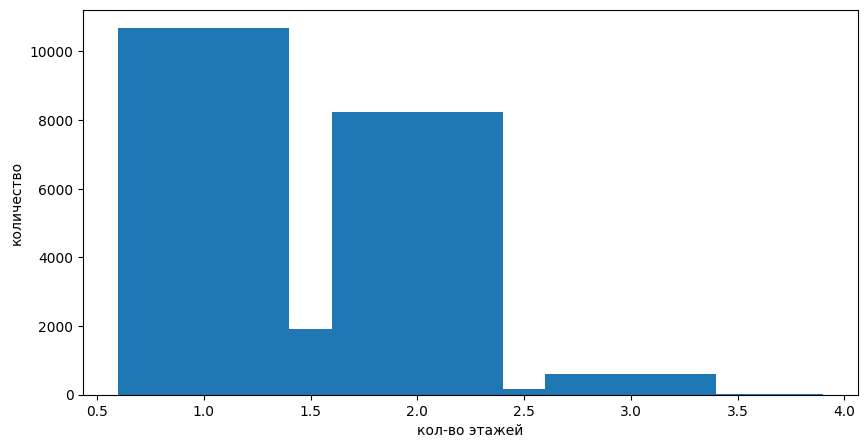

In [11]:
names = data.index
values = data.values

plt.figure(figsize=(10,5))
plt.bar(names, values)
plt.xlabel('кол-во этажей')
plt.ylabel('количество');

Больше всего домов с 1 этажом, на втором месте 2 этажа

### 2.2 Изучите распределение состояния домов

In [12]:
data = df['condition'].value_counts()
data

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

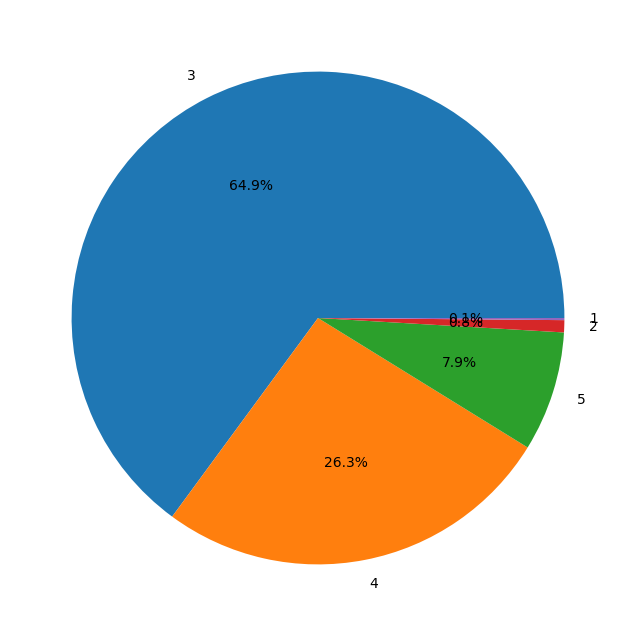

In [13]:
names = data.index
values = data.values
plt.figure(figsize=(8,8))
plt.pie(values, autopct='%.1f%%', labels=names);

64.9% домов в удовлетворительном состоянии, 26.3% - в хорошем...

## Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

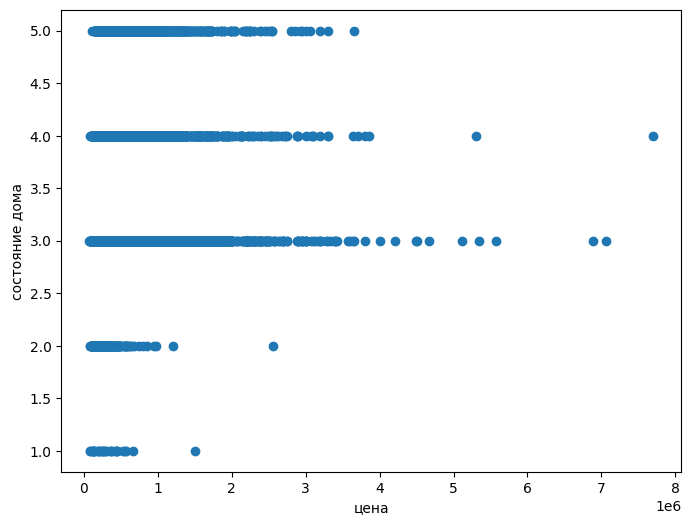

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(df['price'], df['condition'])
plt.xlabel('цена')
plt.ylabel('состояние дома');

С повышением оценки состояния дома увеличивается и стоимость

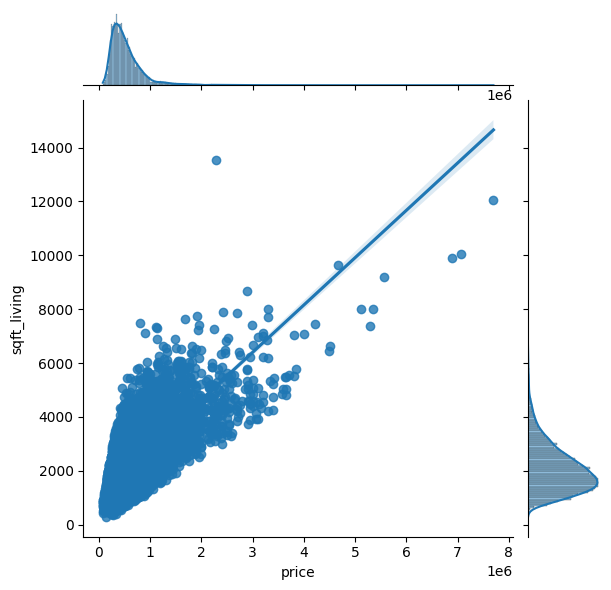

In [15]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

Прослеживается завимость: при увеличении жилой площади увеличивается стоимость

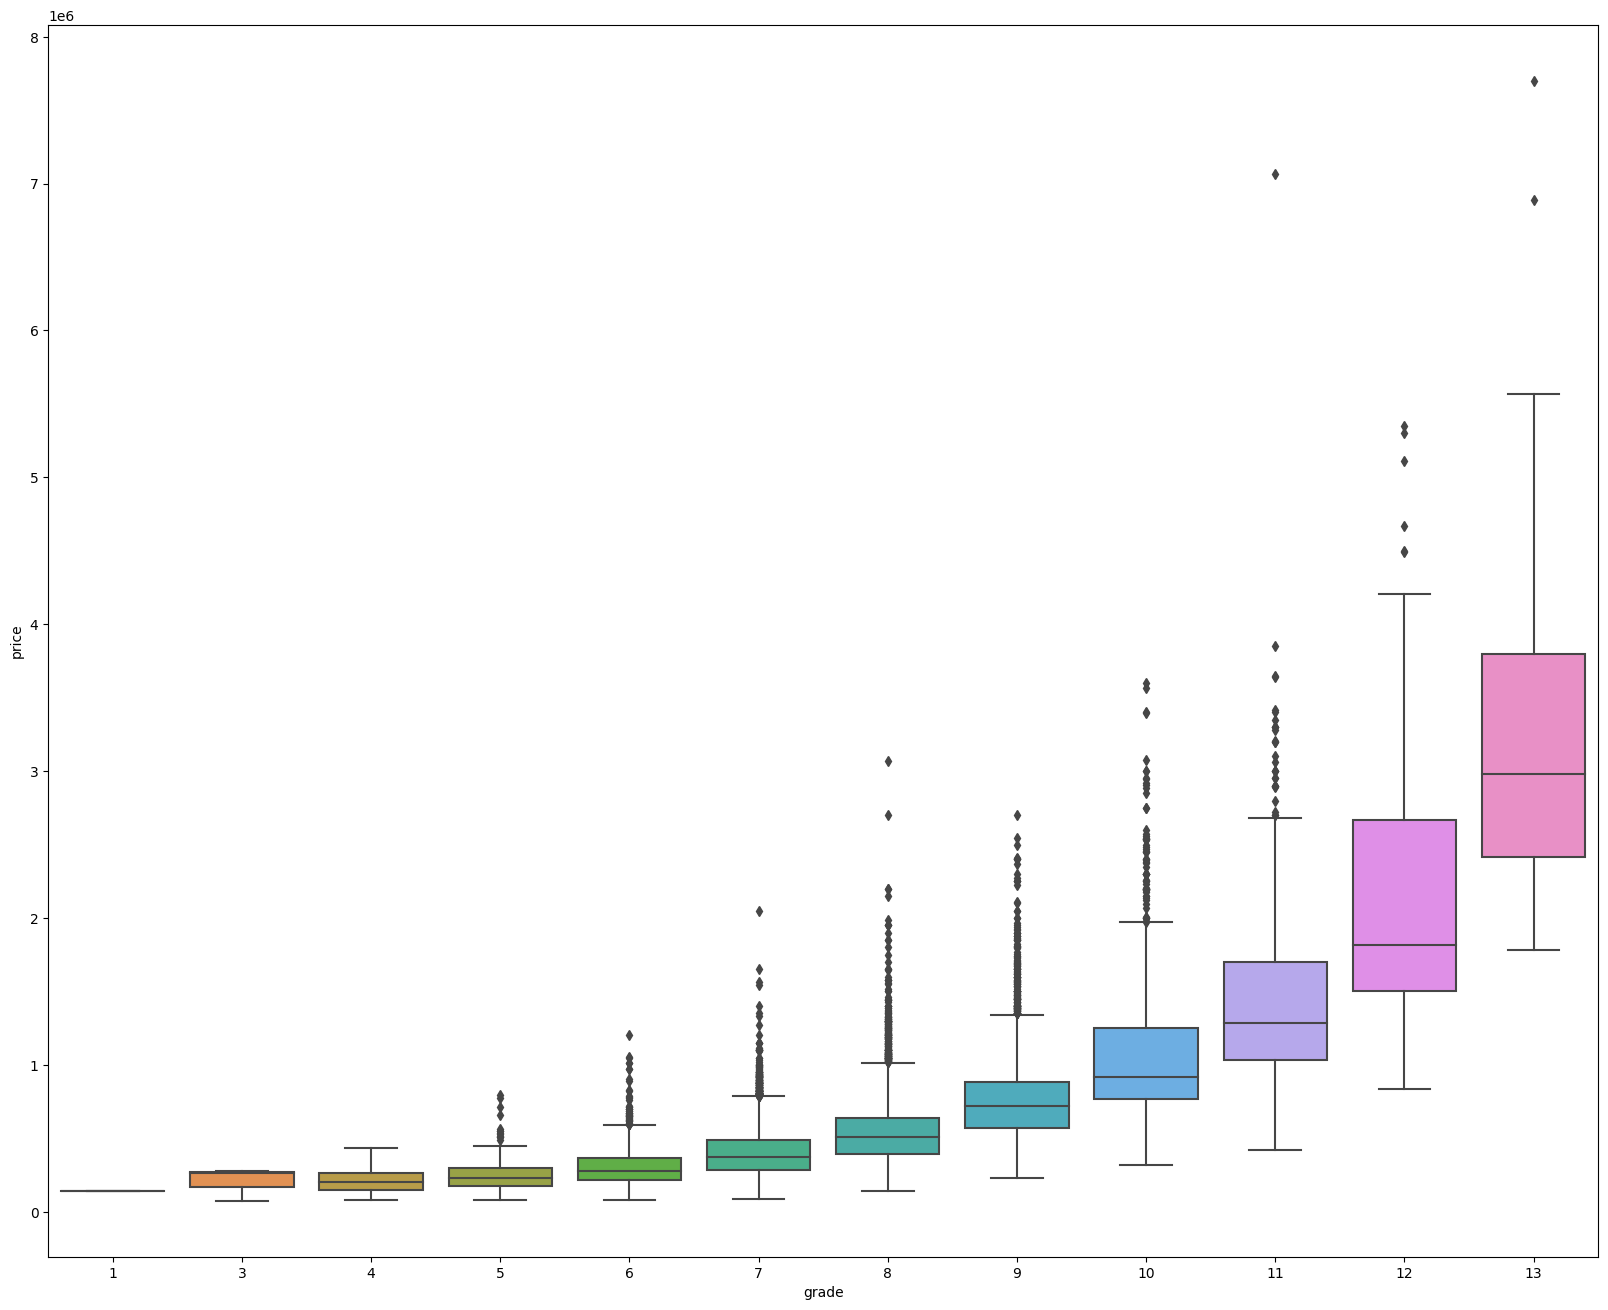

In [16]:
plt.figure(figsize=(20, 16))
sns.boxplot(x=df['grade'], y=df['price'])

plt.xlabel('grade')
plt.ylabel('price');

При увеличении оценки дома увеличивается медианная стоимость

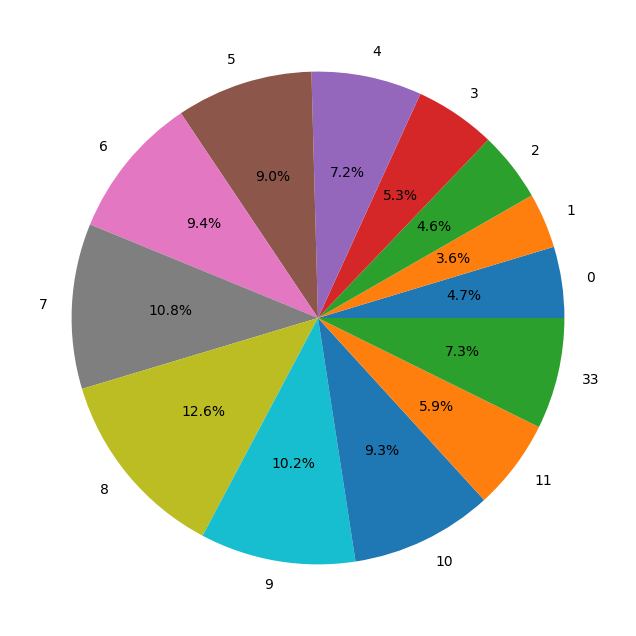

In [17]:
data = df.groupby('bedrooms')['price'].mean()
data

names = data.index
values = data.values
plt.figure(figsize=(8,8))
plt.pie(values, autopct='%.1f%%', labels=names);

Наибольшая средняя стоимость у домов, имеющих от 7 до 9 спален

In [18]:
data = df.groupby('yr_built')['price'].mean().reset_index()

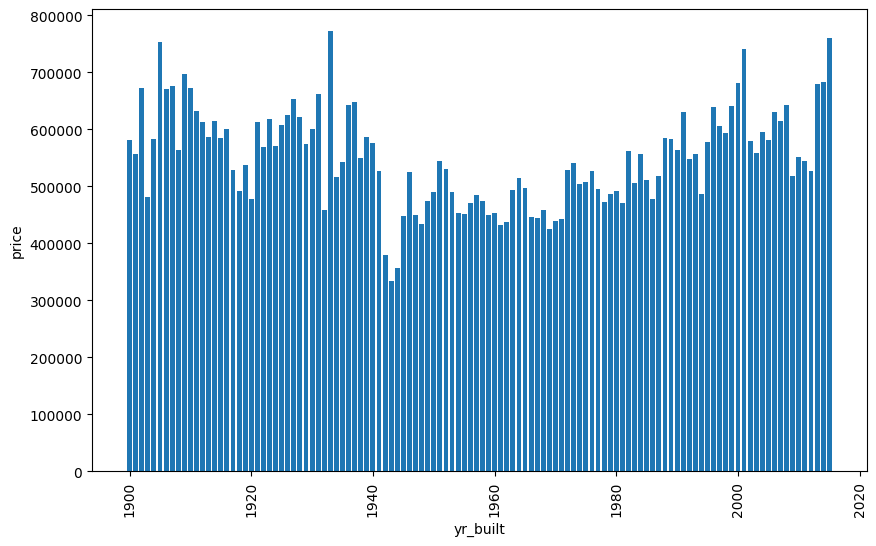

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(data['yr_built'], data['price'])
plt.xlabel('yr_built')
plt.ylabel('price')
plt.xticks(rotation=90);

Наименьшую среднюю цену имеют дома построенные в период с 1941 по 1942